### Project Overview
In today's digital age, social media has become a pivotal platform for brands and businesses to connect with their audience. However, with the vast amount of content being shared daily, it is crucial to optimize social media strategies to stand out and engage effectively. This project, titled "Optimizing Social Media Engagement: A Data-Driven Approach", aims to leverage data analytics to enhance the performance of social media posts across various categories such as health, family, food, and more. 

### Importance of Social Media Analytics
Social media analytics involves the collection and analysis of data from social media platforms to inform business decisions. By understanding how different types of content perform, businesses can tailor their strategies to maximize reach and engagement. This not only helps in building a stronger online presence but also in achieving specific marketing goals such as increased brand awareness, customer loyalty, and sales. 

### Scope and Goals
The primary objective of this project is to increase client reach and engagement by providing valuable insights derived from social media data.

The specific goals include: 
Collecting and Cleaning Data: Extracting tweets from various categories and ensuring the data is clean and ready for analysis. 
Analyzing Engagement Metrics: Evaluating key metrics such as likes, retweets, replies, and quotes to understand content performance. 
Visualizing Data: Creating visual representations of the data to identify trends and patterns. 
Providing Recommendations: Making data-driven recommendations to clients to improve their social media performance. 

By achieving these goals, the project aims to help clients optimize their social media strategies, deliver content more effectively, and achieve faster, more impactful results. 

### Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import random
import plotly.express as px
import plotly.graph_objects as go
import functools

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp


In [ ]:
#import kagglehub

#Download latest version
#path = kagglehub.dataset_download("thedevastator/mrbeast-s-twitter-audience-engagement-analysis-2")

This dataset contains data on MrBeast's Twitter engagement metrics such as likes, retweets, quotes, and audience engagement.

In [2]:
df = pd.read_csv("/kaggle/input/mrbeast-s-twitter-audience-engagement-analysis-2/MrBeast.csv")
df.head()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId
0,"My first order of business, make it where crea...",Fri Dec 23 17:28:33 +0000 2022,2022-12-23 17:28:33+00:00,431513,[Photo(previewUrl='https://pbs.twimg.com/media...,[],2043,NaN,7134,14933,NaN,https://twitter.com/MrBeast/status/16063410018...,1606341001844387840,1606341001844387840
1,@LudwigAhgren time to break this bad boi in 😈 ...,Thu Dec 22 21:38:41 +0000 2022,2022-12-22 21:38:41+00:00,21321,[Photo(previewUrl='https://pbs.twimg.com/media...,[],14,NaN,505,241,NaN,https://twitter.com/MrBeast/status/16060415591...,1606041559123763203,1606041559123763203
2,Can I be the new Twitter CEO?,Thu Dec 22 16:26:21 +0000 2022,2022-12-22 16:26:21+00:00,979124,NaN,[],5154,NaN,25906,40634,NaN,https://twitter.com/MrBeast/status/16059629610...,1605962961033445376,1605962961033445376
3,@Algoruns 😅,Thu Dec 22 03:09:47 +0000 2022,2022-12-22 03:09:47+00:00,30855,NaN,[],2,NaN,109,94,NaN,https://twitter.com/MrBeast/status/16057624964...,1605762496484192256,1605762180854358016
4,Three more years and this video goes public (I...,Thu Dec 22 03:08:32 +0000 2022,2022-12-22 03:08:32+00:00,312123,[Photo(previewUrl='https://pbs.twimg.com/media...,[],324,NaN,3285,7891,NaN,https://twitter.com/MrBeast/status/16057621808...,1605762180854358016,1605762180854358016


In [3]:
# For project purposes, let's temporarily assign random category for each tweet.
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
df['Category'] = np.random.choice(categories, size=len(df))


df = df.sort_values(by='date').reset_index(drop=True)
df.head()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId,Category
0,"@Sorrowfell But you don’t follow me, I’m filin...",Sat Jun 16 14:37:15 +0000 2018,2018-06-16 14:37:15+00:00,303,NaN,[],8,NaN,15,11,NaN,https://twitter.com/MrBeast/status/10079955235...,1007995523570327553,1007963706284826624,Family
1,Take that youtube https://t.co/SgShQtk72r,Sat Jun 16 15:01:03 +0000 2018,2018-06-16 15:01:03+00:00,4019,[Photo(previewUrl='https://pbs.twimg.com/media...,[],23,NaN,90,150,NaN,https://twitter.com/MrBeast/status/10080015127...,1008001512726056960,1008001512726056960,Fitness
2,Rate this me me,Sat Jun 16 15:06:11 +0000 2018,2018-06-16 15:06:11+00:00,686,NaN,[],0,NaN,43,18,NaN,https://twitter.com/MrBeast/status/10080028052...,1008002805297303552,1008001512726056960,Travel
3,@animesh_61912 I swallowed that pill and now I...,Sat Jun 16 15:07:22 +0000 2018,2018-06-16 15:07:22+00:00,163,NaN,[],0,NaN,6,4,NaN,https://twitter.com/MrBeast/status/10080031037...,1008003103784828928,1008001512726056960,Family
4,We had issues powering things with potatoes so...,Sat Jun 16 15:16:53 +0000 2018,2018-06-16 15:16:53+00:00,2373,[Photo(previewUrl='https://pbs.twimg.com/media...,[],3,NaN,66,71,NaN,https://twitter.com/MrBeast/status/10080055004...,1008005500468891648,1008005500468891648,Fashion


# Exploratory data analysis (EDA)

In [4]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))
    
    print("==================================================")
    
    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))
    
    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])
        
    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])
    
    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df)
    
    print("==================================================")
    print("\nDescription of numerical variables")
    
    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))
    
    print("==================================================")
    print("\nDescription of categorical variables")
    
    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))
    
    return


basic_eda(df)

Info : There are 15 columns in the dataset
Info : There are 5302 rows in the dataset

Data type information of different columns
Info : There are 8 categorical columns
Info : There are 7 numerical columns
Categorical columns :  ['content', 'created_at', 'date', 'media', 'outlinks', 'quotedTweet', 'url', 'Category']
Numerical columns :  ['likeCount', 'quoteCount', 'replyCount', 'retweetCount', 'retweetedTweet', 'id', 'conversationId']


,column_name,dtype
0,content,object
1,created_at,object
2,date,object
3,likeCount,int64
4,media,object
5,outlinks,object
6,quoteCount,int64
7,quotedTweet,object
8,replyCount,int64
9,retweetCount,int64



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,likeCount,5302.0,28415.204074,55462.976578,12.0,1808.5,8325.5,32951.5,979124.0
1,quoteCount,5302.0,150.056582,1267.176871,0.0,1.0,4.0,40.0,46150.0
2,replyCount,5302.0,919.466051,7568.820190,0.0,27.0,102.0,421.0,451291.0
3,retweetCount,5302.0,1893.658431,26220.764289,0.0,18.0,81.0,507.0,938303.0
4,retweetedTweet,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Description of categorical variables


,column_name,count,unique,top,freq
0,content,5302,5288,@alexisohanian ❤️,2
1,created_at,5302,5302,Sat Jun 16 14:37:15 +0000 2018,1
2,date,5302,5302,2018-06-16 14:37:15+00:00,1
3,media,613,613,[Photo(previewUrl='https://pbs.twimg.com/media...,1
4,outlinks,5302,183,[],5076


In [5]:
df_clean = df.copy()
df_clean.shape

# Data Cleaning

In [47]:
# df_clean[['likecount', 'quotecount',  'replycount', 'retweetcount']] = df_clean[['likecount', 'quotecount',  'replycount', 'retweetcount']].fillna(0)

,likecount,quotecount,replycount,retweetcount
0,303,8,15,11
1,4019,23,90,150
2,686,0,43,18
3,163,0,6,4
4,2373,3,66,71
...,...,...,...,...
5297,312123,324,3285,7891
5298,30855,2,109,94
5299,979124,5154,25906,40634
5300,21321,14,505,241


In [7]:
# removes duplicate rows based on all columns
df_clean = df_clean.drop_duplicates()
df_clean.shape

(5302, 15)

In [8]:
# Remove any leading or trailing whitespace from column names
df_clean.columns = df_clean.columns.str.strip()

#convert all column names in the DataFrame df to lowercase to ensures uniformity, making it easier to reference columns without worrying about case sensitivity.
df_clean.columns = df_clean.columns.str.lower()

df_clean.columns

Index(['content', 'created_at', 'date', 'likecount', 'media', 'outlinks',
       'quotecount', 'quotedtweet', 'replycount', 'retweetcount',
       'retweetedtweet', 'url', 'id', 'conversationid', 'category'],
      dtype='object')

In [9]:
filtered_cols = ['date','content','category','likecount', 'quotecount',  'replycount', 'retweetcount' ]

# Keep only the related columns specified in 'filtered_cols'
df_clean = df_clean[filtered_cols]

In [10]:
df_clean.head()

,date,content,category,likecount,quotecount,replycount,retweetcount
0,2018-06-16 14:37:15+00:00,"@Sorrowfell But you don’t follow me, I’m filin...",Family,303,8,15,11
1,2018-06-16 15:01:03+00:00,Take that youtube https://t.co/SgShQtk72r,Fitness,4019,23,90,150
2,2018-06-16 15:06:11+00:00,Rate this me me,Travel,686,0,43,18
3,2018-06-16 15:07:22+00:00,@animesh_61912 I swallowed that pill and now I...,Family,163,0,6,4
4,2018-06-16 15:16:53+00:00,We had issues powering things with potatoes so...,Fashion,2373,3,66,71


In [14]:
# Standardizing date format
df_clean[['date']] = df_clean[['date']].apply(pd.to_datetime)
df_clean[['category','content']] = df_clean[['category','content']].astype(str)
df_clean[['likecount','quotecount','replycount','retweetcount']] = df_clean[['likecount','quotecount','replycount','retweetcount']].astype(int)

df_clean.dtypes

date            datetime64[ns, UTC]
content                      object
category                     object
likecount                     int64
quotecount                    int64
replycount                    int64
retweetcount                  int64
dtype: object

# Feature engineering

In [15]:
#Extracting year from date
df_clean['dayofweek'] = df_clean['date'].dt.day_name()
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['hour'] = df_clean['date'].dt.hour

In [17]:

# Calculate Total Engagement Score for each tweet
df_clean['total_engagement'] = df_clean['likecount'] + df_clean['quotecount'] + df_clean['replycount'] + df_clean['retweetcount']
# df['engagement_rate'] = df['total_engagement'] / df['impression']

# Calculate cumulative engagement for each category over time
df_clean['cumulative_engagement'] = df_clean.groupby('category')['total_engagement'].cumsum()


# Data Analysis and Visualization

### Correlation Analysis 

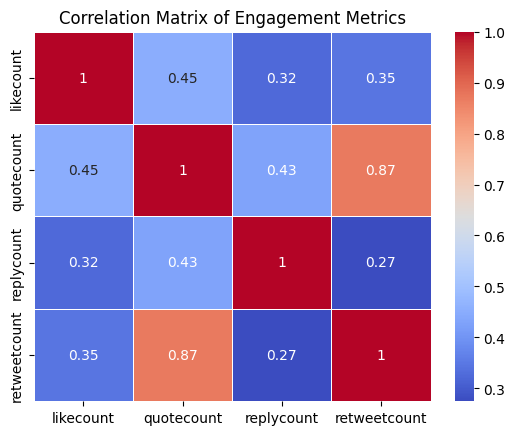

In [19]:
# Examine the relationships between different engagement metrics (likes, retweets, replies, quotes). Use a heatmap to visualize these correlations. 
correlation_matrix = df_clean[[ 'likecount' , 'quotecount' , 'replycount' , 'retweetcount' ]].corr() 

plt.figure() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix of Engagement Metrics') 
plt.show() 


In [48]:
# Explore specific correlations [retweetcount vs. quotecount]
scatter_fig = px.scatter(df_clean, x='retweetcount', y='quotecount', title='Correlation on Retweets vs. Quote')
scatter_fig.show()

The strong correlation of 0.87 between retweet count and quote count indicates that these two metrics frequently increase and decrease together. <br><br> If a tweet receives a high number of retweets, it is likely to also receive a high number of quote tweets. This pattern can help in predicting the overall engagement a tweet might receive based on one of these metrics. Understanding this correlation can aid in crafting more engaging content, optimizing posting times, and targeting specific audiences to maximize interaction.

In [26]:
engagement_counts = df_clean[['likecount', 'retweetcount', 'replycount', 'quotecount']].sum()

fig = px.bar(x=engagement_counts.index, y=engagement_counts.values, title='Total Engagement Counts', labels={'x': 'Engagement Type', 'y': 'Count'})
fig.update_layout(  width=600 ) 
fig.show()

Likes shows to be the most common form of engagement by a significant margin.<br><br>This suggests that users are more inclined to quickly acknowledge content they appreciate or agree with, without necessarily wanting to share it or engage in a conversation. This can be useful for understanding user behavior and preferences on social media. For instance, if a tweet garners a lot of likes but fewer retweets or replies, it might indicate that the content is broadly appreciated but not necessarily compelling enough to share or discuss further.

Likes are the simplest and quickest way for users to interact with a tweet. They require minimal effort compared to other forms of engagement, such as retweeting, replying, or quoting. This ease of interaction often results in a higher number of likes.

### Content Analysis

In [27]:
pd.set_option('display.max_colwidth', None)

In [28]:
# Identify and analyze the top-performing tweets in terms of likes, retweets, replies, and quotes
top_performing_tweets = df_clean[['category','total_engagement','content']].nlargest(5, 'total_engagement')
print("\nOverall Top Performing Tweets:")
top_performing_tweets


Overall Top Performing Tweets:


,category,total_engagement,content
1604,Family,1543448,"I’m going give someone random who retweets this tweet $10,000 because it’s my birthday and I feel like being nice ☺️ (you have to be following me so I can dm you the code if you win)"
3723,Health,1507065,"I’m going to give 5 people that retweet this tweet $10,000 each to celebrate Christmas! (Make sure you follow me so I can dm you if you win!). I will show proof!"
3981,Fitness,1324146,"In 24 hours I’m going to give one random person that retweets this tweet $10,000 in Bitcoin! (Yup, gonna experiment with this instead of cash haha) Make sure you follow me so I can dm you if you win :)"
1832,Fashion,1173468,"I’m going to give 100 random people who retweet this $100. Normally I’d give one person $10,000 but I want to give you guys better odds of winning :)\n\nYou must be following me so I can dm you the code if you win! Will show proof!"
5299,Fashion,1050818,Can I be the new Twitter CEO?


In [29]:
top_liked_tweets = df_clean[['category','likecount','content']].nlargest(5, 'likecount')
print("\nTop Liked Tweets:")
top_liked_tweets


Top Liked Tweets:


,category,likecount,content
5299,Fashion,979124,Can I be the new Twitter CEO?
4858,Family,958240,No takesies backsies https://t.co/vtjWx40m9i
5049,Culture,944957,I was walking around in India and someone asked for a picture. So I asked my translator to ask him what his favorite MrBeast video is and he said that he doesn’t know what a MrBeast is and just wanted a photo with a tall white guy lol
5230,Fitness,584894,"WHAT ARE THE ODDS I RANDOMLY OPEN YOUTUBE TO 111,111,111 SUBSCRIBERS AT EXACTLY 11:11 ON NOVEMBER 11th??? https://t.co/jcIOlLfySi"
3723,Health,580901,"I’m going to give 5 people that retweet this tweet $10,000 each to celebrate Christmas! (Make sure you follow me so I can dm you if you win!). I will show proof!"


In [30]:
top_retweeted_tweets = df_clean[['category','retweetcount','content']].nlargest(5, 'retweetcount')
print("\nTop Retweeted Tweets:")
top_retweeted_tweets


Top Retweeted Tweets:


,category,retweetcount,content
1604,Family,938303,"I’m going give someone random who retweets this tweet $10,000 because it’s my birthday and I feel like being nice ☺️ (you have to be following me so I can dm you the code if you win)"
3723,Health,817831,"I’m going to give 5 people that retweet this tweet $10,000 each to celebrate Christmas! (Make sure you follow me so I can dm you if you win!). I will show proof!"
1832,Fashion,742066,"I’m going to give 100 random people who retweet this $100. Normally I’d give one person $10,000 but I want to give you guys better odds of winning :)\n\nYou must be following me so I can dm you the code if you win! Will show proof!"
3981,Fitness,731363,"In 24 hours I’m going to give one random person that retweets this tweet $10,000 in Bitcoin! (Yup, gonna experiment with this instead of cash haha) Make sure you follow me so I can dm you if you win :)"
2181,Culture,521299,"I’m going to give away $30,000 to 1 random person who retweets this tweet AND follows Twitter Philanthropist @Pulte and me!!! (If you don’t follow us, we can’t dm you the money) Will show proof!"


In [31]:
top_replied_tweets = df_clean[['category','replycount','content']].nlargest(5, 'replycount')
print("\nTop Replied Tweets:")
top_replied_tweets


Top Replied Tweets:


,category,replycount,content
3364,Travel,451291,"Tomorrow I’m going to give whoever ratios me the hardest on this tweet $10,000"
4407,Fashion,164848,"I’m teaming up with @coinbase to give 1 person $100,000 in Bitcoin! Here’s how to enter … \n\n1. Reply to this tweet using the hashtag #CoinBeastSweepstakes\n\n2. Follow @coinbase and @mrbeast\n\n3. That’s pretty much it!"
2734,Family,106032,If you’re reading this you MUST reply with the most recent photo on your phone. You’re not allowed to give context just reply with the photo and no text. Good luck 😂
3881,Culture,94420,This tweet is the one time you’re allowed to self promo. Reply with whatever!
1604,Family,73755,"I’m going give someone random who retweets this tweet $10,000 because it’s my birthday and I feel like being nice ☺️ (you have to be following me so I can dm you the code if you win)"


In [32]:
top_quoted_tweets = df_clean[['category','quotecount','content']].nlargest(5, 'quotecount')
print("\nTop Quoted Tweets:")
top_quoted_tweets


Top Quoted Tweets:


,category,quotecount,content
1604,Family,46150,"I’m going give someone random who retweets this tweet $10,000 because it’s my birthday and I feel like being nice ☺️ (you have to be following me so I can dm you the code if you win)"
3723,Health,36711,"I’m going to give 5 people that retweet this tweet $10,000 each to celebrate Christmas! (Make sure you follow me so I can dm you if you win!). I will show proof!"
3009,Food,31952,"I’m going to give 10 random people who retweet this tweet $10,000 EACH! You must be following @Pulte and me so we can dm you if you win $10,000! Ends in 72 hours, will show proof ❤️"
3375,Fashion,26035,"And since the BTS community put in so much effort and this was all in good fun I’ll also give them $10,000. GGs all around ❤️ https://t.co/sqrpw893UV"
3981,Fitness,23865,"In 24 hours I’m going to give one random person that retweets this tweet $10,000 in Bitcoin! (Yup, gonna experiment with this instead of cash haha) Make sure you follow me so I can dm you if you win :)"


So far, analysis indicates that tweets crafted as engagement bait, such as those offering rewards for retweets,can significantly boost interaction rates by leveraging incentives to encourage user participation. To maximize reach and engagement, it's essential to integrate these strategies with authentic, high-quality content. This approach ensures sustained, genuine engagement while avoiding the risk of appearing spammy.

In [33]:

engagement_per_category = df_clean.groupby('category').agg(
    total_likes=('likecount', 'sum'),
    total_retweets=('retweetcount', 'sum'),
    total_replies=('replycount', 'sum'),
    total_quotes=('quotecount', 'sum'),
    total_engagement=('total_engagement', 'sum'),
).reset_index()

# Comparing engagement metrics across different types of content category: what resonates most with client's audience
fig = px.bar(engagement_per_category.sort_values(by='total_engagement', ascending=False), x="category", y='total_engagement', title = "Category vs. Total Engagements" , width=700)
fig.show()



fig = sp.make_subplots(rows=2, cols=2, subplot_titles=('Likes', 'Retweets', 'Replies', 'Quotes'))

# Box plot for Likes
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_likes', ascending=False), x='category', y='total_likes').data[0], row=1, col=1)

# Box plot for Retweets
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_retweets', ascending=False), x='category', y='total_retweets').data[0], row=1, col=2)

# Box plot for Replies
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_replies', ascending=False), x='category', y='total_replies').data[0], row=2, col=1)

# Box plot for Quotes
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_quotes', ascending=False), x='category', y='total_quotes').data[0], row=2, col=2)

# Update layout
fig.update_layout(height=800, title_text="Distribution of Engagement Metrics Across Categories")
fig.show()

Analysis reveals that tweets categorized under Health receive the highest levels of engagement across most metrics, including likes, retweets, and quotes. This indicates a strong interest and responsiveness from users towards health-related content.

To leverage the high engagement potential of health-related tweets, prioritize creating and sharing high-quality health content. Encourage more interaction by asking questions or sharing personal stories to prompt replies. Balance this with other engaging topics to maintain a diverse and interesting feed.

### Engagement Metrics Analysis

In [50]:
# Calculate basic statistics for replies and quotes
total_replies = df_clean['replycount'].sum()
average_replies = df_clean['replycount'].mean()
median_replies = df_clean['replycount'].median()

print(f"Total Replies: {total_replies}")
print(f"Average Replies per Tweet: {average_replies}")
print(f"Median Replies per Tweet: {median_replies}")



Total Replies: 4875009
Average Replies per Tweet: 919.4660505469634
Median Replies per Tweet: 102.0


While most tweets receive a relatively low number of replies, a few tweets receive an exceptionally high number of replies, skewing the average. This indicates that certain tweets generate significant discussion and interaction.

In [51]:

total_quotes = df_clean['quotecount'].sum()
average_quotes = df_clean['quotecount'].mean()
median_quotes = df_clean['quotecount'].median()

print(f"\nTotal Quotes: {total_quotes}")
print(f"Average Quotes per Tweet: {average_quotes}")
print(f"Median Quotes per Tweet: {median_quotes}")


Total Quotes: 795600
Average Quotes per Tweet: 150.05658242172765
Median Quotes per Tweet: 4.0


While most tweets receive few quotes, some tweets are quoted extensively. This suggests that certain tweets prompt users to add their own commentary or context, leading to higher quote counts.

In [54]:

total_like = df_clean['likecount'].sum()
average_like = df_clean['likecount'].mean()
median_like = df_clean['likecount'].median()

print(f"\nTotal Likes: {total_like}")
print(f"Average Likes per Tweet: {average_like}")
print(f"Median Likes per Tweet: {median_like}")


Total Likes: 150657412
Average Likes per Tweet: 28415.204073934365
Median Likes per Tweet: 8325.5


While many tweets receive a moderate number of likes, a few tweets are extremely popular and receive a very high number of likes, significantly raising the average.

In [55]:

total_retweet = df_clean['retweetcount'].sum()
average_retweet = df_clean['retweetcount'].mean()
median_retweet = df_clean['retweetcount'].median()

print(f"\nTotal Retweets: {total_retweet}")
print(f"Average Retweets per Tweet: {average_retweet}")
print(f"Median Retweets per Tweet: {median_retweet}")


Total Retweets: 10040177
Average Retweets per Tweet: 1893.6584307808373
Median Retweets per Tweet: 81.0


While most tweets receive a modest number of retweets, some tweets are retweeted extensively, which increases the average.

Engagement in the form of likes, retweets, replies, and quotes tends to be concentrated around a select few highly engaging tweets, while most tweets receive lower levels of interaction. This pattern helps identify which tweets resonate most with the audience and foster deeper engagement. <br> By analyzing the characteristics of these popular tweets, we can refine the content strategy to maximize reach and interaction.

### Trend Analysis

In [39]:
engagement_overtime = px.line(df_clean.groupby(['date'])['total_engagement'].sum().reset_index(), x='date', y='total_engagement', title='Engagements Over Time')
engagement_overtime.show()

The engagement over time analysis reveals a consistent trend in user interactions, with notable spikes in engagement on specific dates. These spikes suggest that certain events, announcements, or content types resonate particularly well with the audience, driving higher levels of interaction. 

In [40]:

melted_df_hour = df_clean[['hour','likecount','quotecount','replycount','retweetcount']].melt(id_vars=['hour'], var_name='metrics', value_name='count')


fig = px.bar(melted_df_hour.groupby(['hour','metrics'])['count'].sum().reset_index(), x='hour', y='count', color='metrics',title='Engagement by Hour') 
fig.update_layout( 
    xaxis_title='Hour', 
    yaxis_title='Engagement Count', 
)

fig.show()


The highest engagement occurs at 8 PM followed closely by 9 PM, evening hours are prime time for user activity. Engagement remains consistently high from 2 PM to 11 PM, indicating that the late afternoon to late evening period is particularly active. The lowest engagement is observed at 9 AM, shows that early morning hours are less active. Engagement starts to increase from noon onwards, with a significant rise in the afternoon, peaking in the evening.

In [41]:
melted_df_week = df_clean[['dayofweek','likecount','quotecount','replycount','retweetcount']].melt(id_vars=['dayofweek'], var_name='metrics', value_name='count')

fig = px.bar(melted_df_week.groupby(['dayofweek','metrics'])['count'].sum().reset_index(), x='dayofweek', y='count', color='metrics',title='Weekday Distribution') 
fig.update_layout( 
    xaxis_title='Weekday', 
    yaxis_title='Engagement Count',
    width = 800
)
fig.show()

Saturday shows to have the highest engagement, indicating peak user activity during the weekend.Monday also sees high engagement suggesting users catch up on social media after the weekend. Engagement levels from Tuesday to Thursday are consistent reflecting steady midweek activity. Sunday has the lowest engagement among weekend days possibly due to users preparing for the upcoming week. Friday shows moderate engagement, likely as users wind down their week and start engaging more heading into the weekend.

In [42]:
engagement_pivot = df_clean.pivot_table(values='total_engagement', index='dayofweek', columns='hour', aggfunc='sum').fillna(0)


fig = go.Figure(data=go.Heatmap( z=engagement_pivot.values,x=engagement_pivot.columns,y=engagement_pivot.index,colorscale='YlGnBu'))
fig.update_layout( title='Engagement Patterns by Day and Hour',xaxis_title='Hour of Day', yaxis_title='Day of Week')
fig.show()

The analysis indicates that Saturday is the day with the highest engagement, and the peak engagement hour is 20:00 (8 PM). This trend is primarily driven by a high number of likes. <br>
Saturdays are part of the weekend when people generally have more free time to browse social media. This increased availability can lead to higher engagement levels.<br>
8 PM is considered prime time for social media usage. Many users are likely to be relaxing at home, scrolling through their feeds after dinner, making it an optimal time for engagement.<br><br>

To maximize engagement, schedule important tweets or posts for Saturdays around 8 PM. This timing aligns with when your audience is most active and likely to interact with your content.<br>
Plan high-quality, engaging content specifically for this time slot. This could include announcements, promotions, or content that is likely to generate likes and other forms of engagement.<br>
Consider running special campaigns or interactive posts during this peak time to capitalize on the higher user activity. This could include live Q&A sessions, giveaways, or polls.